In [1]:
import numpy as np
x = np.array([[1,2,3],[4,5,6]])  
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


In [2]:
from scipy import sparse 
eye = np.eye(4)

In [3]:
print(eye)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


## CSR

In [4]:
sparse_matrix = sparse.csr_matrix(eye)
print(sparse_matrix)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
data = np.ones(4)
print(data)

[1. 1. 1. 1.]


In [6]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print(eye_coo)


  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt

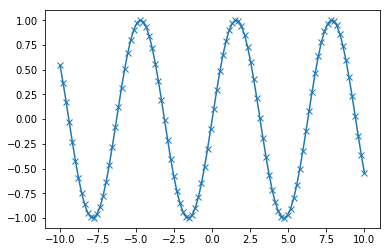

In [8]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x,y,marker="x")

In [9]:
import pandas as pd
data = {'Name':["Ana","Piter","Lisa","Sam"],
    'Location':["Perm","New York","London","Moscow"],
    'Age':[12,7,55,33]
}
display(pd.DataFrame(data))

,Name,Location,Age
0,Ana,Perm,12
1,Piter,New York,7
2,Lisa,London,55
3,Sam,Moscow,33


In [10]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [11]:
print(iris_dataset.target_names)

['setosa' 'versicolor' 'virginica']


In [12]:
print(iris_dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
print(iris_dataset['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
print(iris_dataset['target'][:5])

[0 0 0 0 0]


In [15]:
print(iris_dataset['target'].shape)

(150,)


In [16]:
print(iris_dataset['target_names'].shape)

(3,)


In [17]:
print(iris_dataset['target'][:10])

[0 0 0 0 0 0 0 0 0 0]


In [18]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, Y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)
print(x_train.shape)

(112, 4)


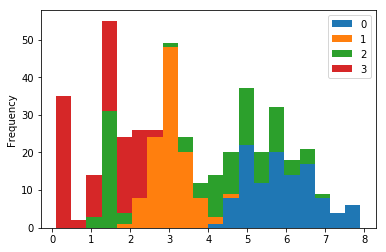

In [19]:
pd.DataFrame(x_train).plot.hist(stacked=True, bins=20)

In [20]:
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


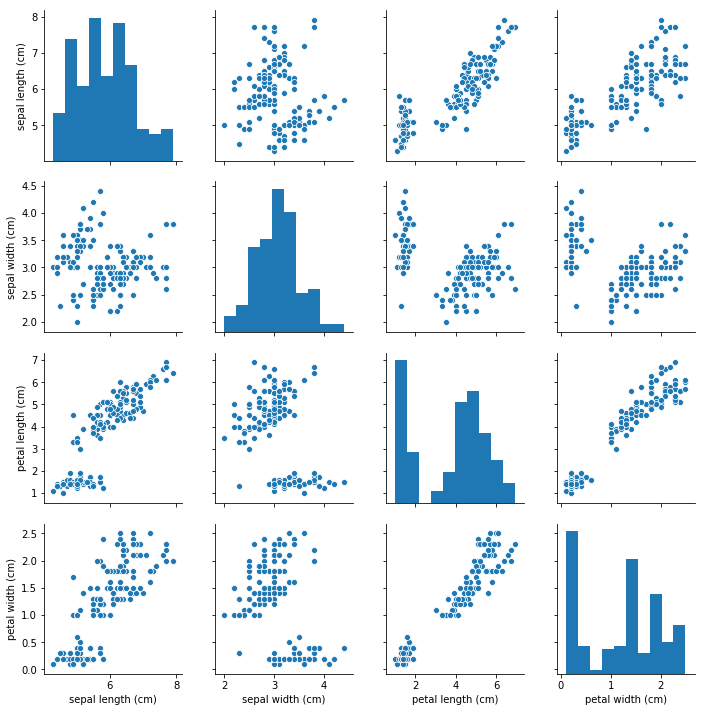

In [21]:
import seaborn as sns
sns_plot = sns.pairplot(df)


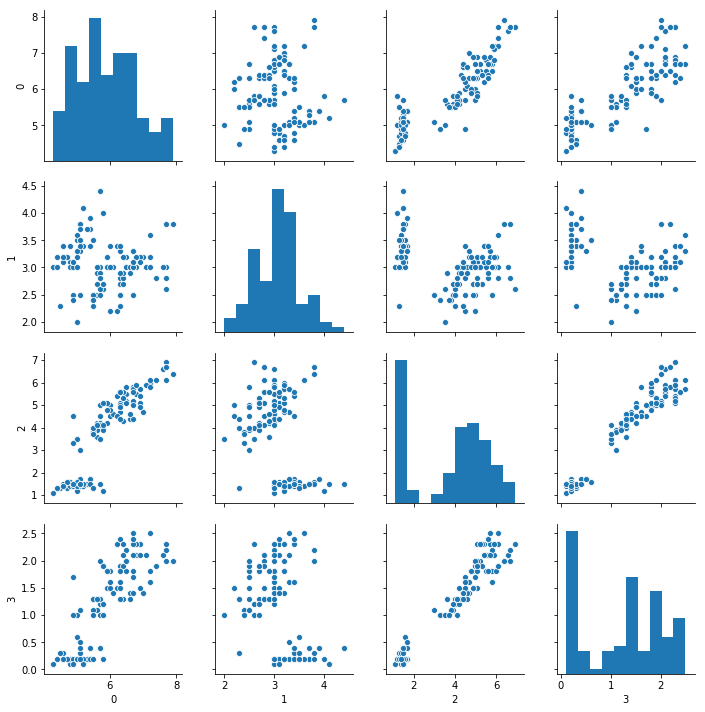

In [22]:
sns_plot = sns.pairplot(pd.DataFrame(x_train))


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [59]:
print(knn.predict([[1.1, 2.7, 3.4, 5.6]]))

[2]


In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, knn.predict(X_test))

0.9736842105263158

In [67]:
knn.score(X_test, Y_test)

0.9736842105263158